In [1]:
import pandas as pd
import numpy as np

In [2]:
data_folder = "../data/"

In [3]:
def push_nans_to_bottom(df):
    for col in df.columns:
        non_nans = df[col].dropna()
        nans = df[col].isna().sum()
        df[col] = pd.concat([non_nans, pd.Series([np.nan] * nans)], ignore_index=True)
    return df

In [4]:
df1 = pd.read_excel(data_folder + 'data_MB_genes_Northcott2017.xlsx', "Northocott2017_genetics")

In [5]:
df2 = pd.read_excel(data_folder + 'data_MB_genes_Northcott2017.xlsx', "Lin2016_TFs")

In [6]:
df = pd.concat([df1, df2], ignore_index=True)

In [7]:
# Apply the function
df = push_nans_to_bottom(df)

In [7]:
# Replace NaN with empty strings
df = df.fillna('')

# Drop rows that are completely empty (all columns are NaN or empty)
df = df.replace('', np.nan).dropna(how='all')

# Replace NaN with empty strings
df = df.fillna('')

In [8]:
df

,WNT,SHH,G3,G4
0,CTNNB1,PTCH1,MYC,PRDM6
1,APC,SUFU,SMARCA4,KMT2D
2,CSNK2B,SMO,GFI1B,KMT2C
3,ARID1A,KMT2D,ATM,KDM6A
4,ARID2,KMT2C,PTEN,ZMYM3
5,ATM,CREBBP,KBTBD4,MED12
6,PIK3CA,GSE1,CRX,GFI1B
7,BAI3,BCOR,HLX,MYCN
8,EPHA7,GLI2,IRX6,OTX2
9,DDX3X,TCF4,LHX9,ZIC1


In [9]:
df.to_csv("../data/Northcott_Lin_genes.csv", index=False)

In [8]:
from venny4py.venny4py import *

In [9]:
set1 = df['WNT'].dropna()
set2 = df['SHH'].dropna()
set3 = df['G3'].dropna()
set4 = df['G4'].dropna()

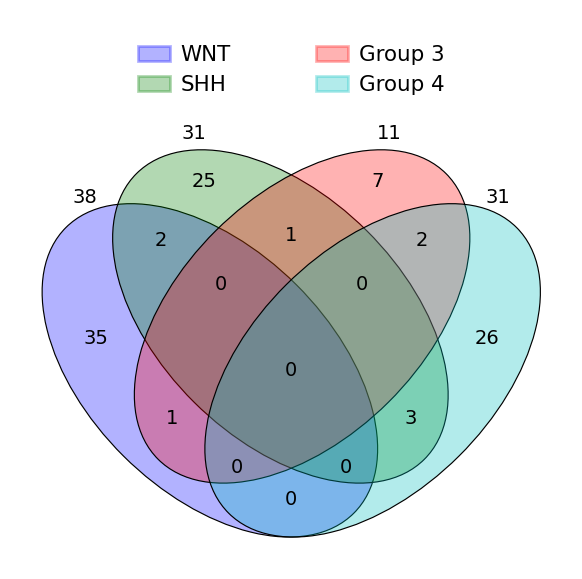

In [10]:
sets_2 = {
    'WNT': set(set1),
    'SHH': set(set2),
    'Group 3': set(set3),
    'Group 4': set(set4)
}

venny4py(sets=sets_2, out='../Figures')